In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
#code that implements K-means clustering from scratch
import random
import numpy as np
class KMeans:
    def __init__(self,n_clusters=2,max_iters=100):
        self.n_clusters=n_clusters
        self.max_iters=max_iters
        self.centroids=None
    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iters):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)


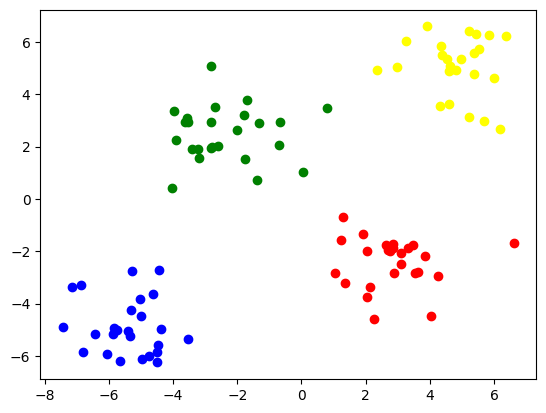

In [31]:
centroids=[(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
cluster_std=[1,1,1,1]

X,y=make_blobs(n_samples=100,centers=centroids,cluster_std=cluster_std,random_state=2,n_features=2)
km=KMeans(n_clusters=4,max_iters=100)
y_means=km.fit_predict(X)
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()